# Isochronous sequences with target speech stimulus

For this example, we will attempt to recreate the stimuli from the first experiment in [Bosker (2017)](https://link.springer.com/article/10.3758/s13414-016-1206-4#Sec1). 

In [33]:
from thebeat.core import Sequence, SoundStimulus, SoundSequence
import numpy as np

rng = np.random.default_rng(seed=123)

In [34]:
# We suppress warnings, but let's hide that to avoid confusion
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Introduction
In the first experiment in that paper, the author tested whether the tempo of a sequence of pure tones changes the perception of a subsequently presented speech sound that was somewhere in between /ɑs/ and /aːs/. The relevant bits from the method section are replicated here:

> "The stimuli in the experiment consisted of tone precursors followed by target words (see Fig. 1). Four different precursors, each with a total duration of 4 seconds, were created in Praat (Boersma & Weenink, 2012) by crossing two different tone durations (71 vs. 125 ms) with two presentation rates (4 vs. 7 Hz). The fundamental frequency of all pure tones was fixed at 440 Hz, thus avoiding spectral masking of the target vowels’ F0, F1, and F2. "

Replicated from [Bosker (2017)](https://link.springer.com/article/10.3758/s13414-016-1206-4#Sec1) with permission from the author.

---

## Making the sequences

In [35]:
seq_slow = Sequence.generate_isochronous(n_events=17, ioi=250)
seq_fast = Sequence.generate_isochronous(n_events=29, ioi=1000/7)

If we want to see what the sequences look like, we can plot the sequence.

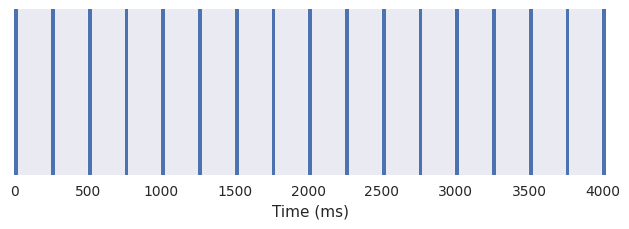

In [36]:
seq_slow.plot_sequence(x_axis_label="Time (ms)");

## Making the stimuli
All sounds in the experiment had a 20 ms raised-cosine on- and off-ramp. The durations were respectively 71 and 125 ms for the short and long sounds.

In [37]:
stim_short = SoundStimulus.generate(freq=440, duration_ms=71, 
                                    onramp_ms=20, offramp_ms=20,
                                    ramp_type='raised-cosine')
stim_long = SoundStimulus.generate(freq=440, duration_ms=125, 
                                   onramp_ms=20, offramp_ms=20,
                                   ramp_type='raised-cosine')

See what it looks like:

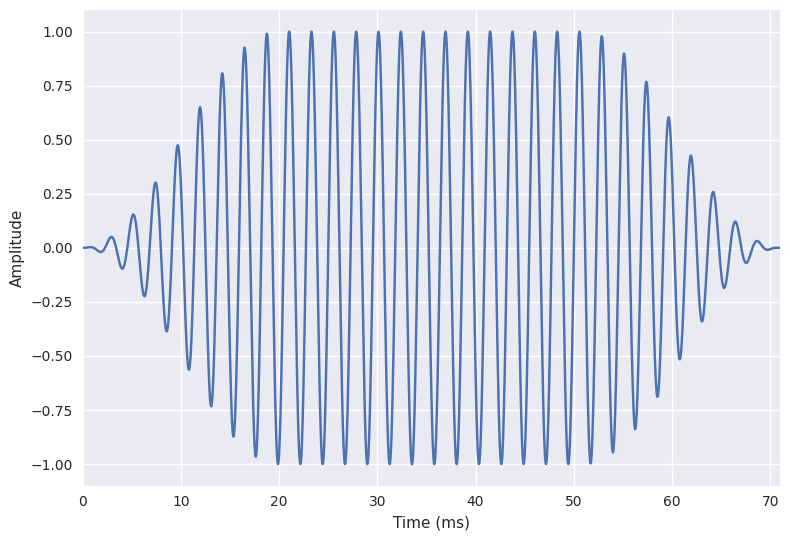

In [38]:
stim_short.plot_waveform();

## Making the trials
We will make 4 types of trials. For the slow sequences, we need 16 tones plus one target stimulus. For the long sequences, we need 28 tones plus one target stimulus. Here, we load an [example target .wav file from this folder](aas.wav), but you can easily use another audio files instead: ``SoundStimulus.from_wav('yourfile.wav')``.

In [39]:
target = SoundStimulus.from_wav('aas.wav')

# Adjust the amplitude of the target slightly
target.change_amplitude(1.7)

We first make lists for the stimuli. 16 or 28 times the created stimulus followed by one time the target.

In [40]:
stims_slowlong = [stim_long] * 16 + [target]
stims_slowshort = [stim_short] * 16 + [target]
stims_fastlong = [stim_long] * 28 + [target]
stims_fastshort = [stim_short] * 28 + [target]

# Print one to see what the lists look like
print(stims_slowlong)

[SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=125.0), SoundStimulus(duration_ms=392.0625)]


In [41]:
trial_slowlong = SoundSequence(stims_slowlong, seq_slow, name="Slow trial with long sounds")
trial_slowshort = SoundSequence(stims_slowshort, seq_slow)
trial_fastlong = SoundSequence(stims_fastlong, seq_fast)
trial_fastshort = SoundSequence(stims_fastshort, seq_fast)

That's it! We can plot these trials (``.plot_waveform()`` or ``.plot_sequence()``), we can play them (``.play()``) or we can write them to disk (``.write_wav()``).

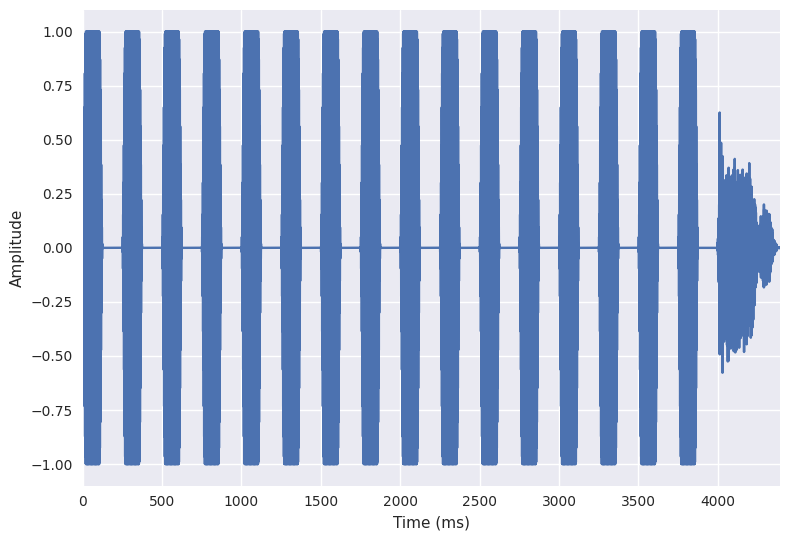

In [42]:
trial_slowlong.plot_waveform();

In [43]:
# You can listen to the sound here. You can ignore this code, it's only for this website.
# In your Python editor you would simply use e.g. trial_slowlong.play()
from IPython.display import Audio
Audio(data=trial_slowlong.samples, rate=trial_slowlong.fs)

## Code summary

In [44]:
from thebeat.core import Sequence, SoundStimulus, SoundSequence
import numpy as np
import importlib.resources as pkg_resources
import thebeat.resources

rng = np.random.default_rng(seed=123)

seq_slow = Sequence.generate_isochronous(n_events=17, ioi=250)
seq_fast = Sequence.generate_isochronous(n_events=29, ioi=1000/7)

stim_short = SoundStimulus.generate(freq=440, duration_ms=71, onramp_ms=10, offramp_ms=10)
stim_long = SoundStimulus.generate(freq=440, duration_ms=125, onramp_ms=10, offramp_ms=10)

target = SoundStimulus.from_wav('aas.wav')
target.change_amplitude(1.7)

stims_slowlong = [stim_long] * 16 + [target]
stims_slowshort = [stim_short] * 16 + [target]
stims_fastlong = [stim_long] * 28 + [target]
stims_fastshort = [stim_short] * 28 + [target]

trial_slowlong = SoundSequence(stims_slowlong, seq_slow)
trial_slowshort = SoundSequence(stims_slowshort, seq_slow)
trial_fastlong = SoundSequence(stims_fastlong, seq_fast)
trial_fastshort = SoundSequence(stims_fastshort, seq_fast)